<h1 align="center"><b>Capitolo 2: Sistemi di equazioni non lineari</b></h1>

In [1]:
from numpy import e
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

def show10(n):
    return "{0:.10f}".format(n)

## 1.1) Studio analitico, tabulazione e studio del grafico

Consideriamo la seguente funzione:
$$
f(\lambda) = e^{\lambda} + \frac{0,435}{\lambda} (e^{\lambda} - 1) - 1,564 = 0
$$

Vogliamo considerarne la tabulazione e il grafico. Lo studio analitico è riportato nelle note. Iniziamo riportando la tabulazione

In [2]:
def f1(l: float) -> float:
    return e**l + 0.435/l * (e**l - 1) - 1.564


for i in range(10, 21, 2):
    print("{0:.2f}".format(i/100), round(f1(i/100), 15), sep="    ")

0.10    -0.001335588295285
0.12    0.025672938554613
0.14    0.053195959592184
0.16    0.081243551500795
0.18    0.109825990666185
0.20    0.138953757158539


Consideriamo ora invece il grafico della funzione in un certo intervallo:

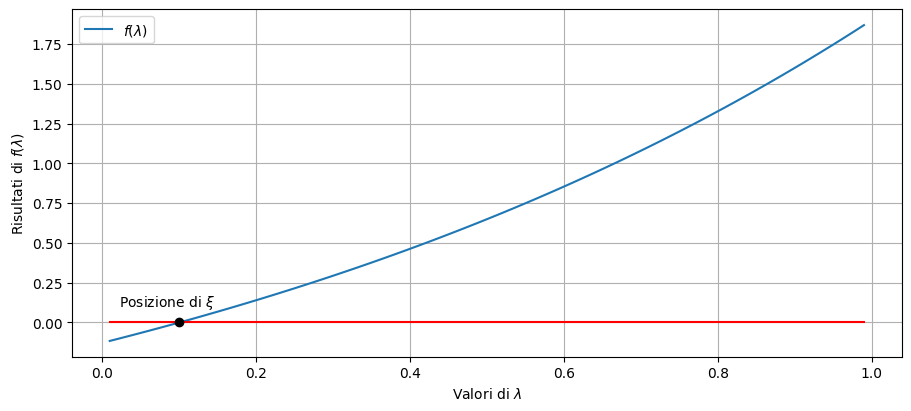

In [3]:
l = [i/100 for i in range(1, 100)]
f_l = [f1(i) for i in l]

plt.figure(figsize=(9, 4), layout='constrained')
plt.plot(l, f_l, label="$f(\\lambda)$")
plt.plot(l, [0 for _ in range(1, 100)], color="red")
plt.plot(0.1, 0, "o", color="black")
plt.annotate("Posizione di $\\xi$", (0.085, 0.1), ha="center")
plt.xlabel("Valori di $\\lambda$")
plt.ylabel("Risultati di $f(\\lambda)$")
plt.legend()
plt.grid()
savefig('../../notes/assets/image-002.png', transparent=True)

## 1.2) Scelta dell'intervallo di osservazione

Supponiamo di avere la funzione
$$
p(x) = x^4 + 2x^3 + 7x^2 - 11 = 0
$$
Mostriamo qui due plots con intervalli diversi

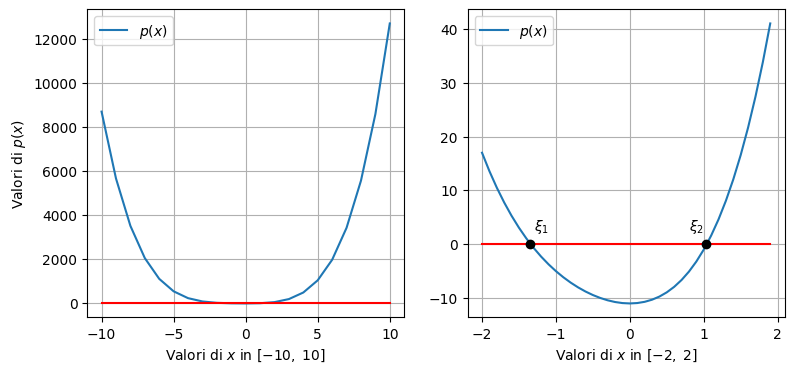

In [4]:
def f2(x: float) -> float:
    return x**4 + 2 * x**3 + 7 * x**2 - 11

x1 = [i for i in range(-10, 11)]
y1 = [f2(i) for i in x1]
x2 = [i/10 for i in range(-20, 20)]
y2 = [f2(i) for i in x2]

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].plot(x1, y1, label="$p(x)$")
axs[0].plot(x1, [0 for _ in x1], color="red")
axs[1].plot(x2, y2, label="$p(x)$")
axs[1].plot(x2, [0 for _ in x2], color="red")
axs[0].legend()
axs[1].legend()
axs[0].set_ylabel("Valori di $p(x)$")
axs[0].set_xlabel("Valori di $x$ in $[-10, \\; 10]$")
axs[1].set_xlabel("Valori di $x$ in $[-2, \\; 2]$")
axs[1].plot(-1.35, 0, 'o', color="black")
axs[1].plot(1.025, 0, 'o', color="black")
axs[1].annotate("$\\xi_1$", (-1.2, 2.5), ha="center")
axs[1].annotate("$\\xi_2$", (0.9, 2.5), ha="center")
axs[0].grid()
axs[1].grid()
savefig('../../notes/assets/image-003.png', transparent=True)

## 1.3) Metodo di bisezione (o dicotomico)

In [5]:
def bisezione(a: float, b: float, tol: float, fn) -> tuple:
    """Calcola la radice di una funzione tramite il metodo di bisezione (o dicotomico)

    Parametri:
        - a: float      inizio dell'intervallo
        - b: float      fine dell'intervallo
        - x_0: float    x iniziale (mettere a 0)
        - tol: float    tolleranza del metodo
        - fn: function  funzione sulla quale viene eseguito il metodo
        - it: int       iterazione (mettere a 1)
    """

    def __bisezione_routine(a, b, x_0, tol, fn, it):
        x = a + b / 2
        y = fn(x)
        diff = abs(x - x_0)
        
        print(f"Iterazione {it}", f"[{show10(a)}, {show10(b)}]", f"x = {show10(x)}", f"f(x) = {show10(y)}", f"|x - x_prev| = {show10(diff)}", sep="\t")
        if (y == 0) or (diff < tol):
            print(f"    Terminato: {"y == 0" if (y == 0) else "tolleranza raggiunta"}")
            print(f"    x = {show10(x)}, raggiunto y = {show10(y)}")
            return a + (b - a) / 2
    
        __bisezione_routine(a, x, x, tol, fn, it+1) if fn(a) * fn(x) < 0 else __bisezione_routine(x, b, x, tol, fn, it+1)
        pass

    __bisezione_routine(a, b, 0, tol, fn, 1)
    pass

In [6]:
print("Iterazioni", "[a, b]", "x", "f(x)", "Differenza", sep="\t\t\t")
print("-"*123)
bisezione(0.05, 0.15, 1e-10, f1)

Iterazioni			[a, b]			x			f(x)			Differenza
---------------------------------------------------------------------------------------------------------------------------
Iterazione 1	[0.0500000000, 0.1500000000]	x = 0.1250000000	f(x) = 0.0325050697	|x - x_prev| = 0.1250000000
Iterazione 2	[0.0500000000, 0.1250000000]	x = 0.1125000000	f(x) = 0.0154849836	|x - x_prev| = 0.0125000000
Iterazione 3	[0.0500000000, 0.1125000000]	x = 0.1062500000	f(x) = 0.0070499093	|x - x_prev| = 0.0062500000
Iterazione 4	[0.0500000000, 0.1062500000]	x = 0.1031250000	f(x) = 0.0028509822	|x - x_prev| = 0.0031250000
Iterazione 5	[0.0500000000, 0.1031250000]	x = 0.1015625000	f(x) = 0.0007561547	|x - x_prev| = 0.0015625000
Iterazione 6	[0.0500000000, 0.1015625000]	x = 0.1007812500	f(x) = -0.0002901021	|x - x_prev| = 0.0007812500
Iterazione 7	[0.1007812500, 0.1015625000]	x = 0.1515625000	f(x) = 0.0693463485	|x - x_prev| = 0.0507812500
Iterazione 8	[0.1007812500, 0.1515625000]	x = 0.1765625000	f(x) = 0.1048748686	|x 

## 1.4) Metodo di Newton-Raphson

In [7]:
def f3(x: float) -> float:
    return 0.03 * x**2 + 0.2 * x - 1.5

def tan1(x: float) -> float:
    return 0.74*x - 3.93

def tan2(x: float) -> float:
    return 0.518648*x - 2.346141

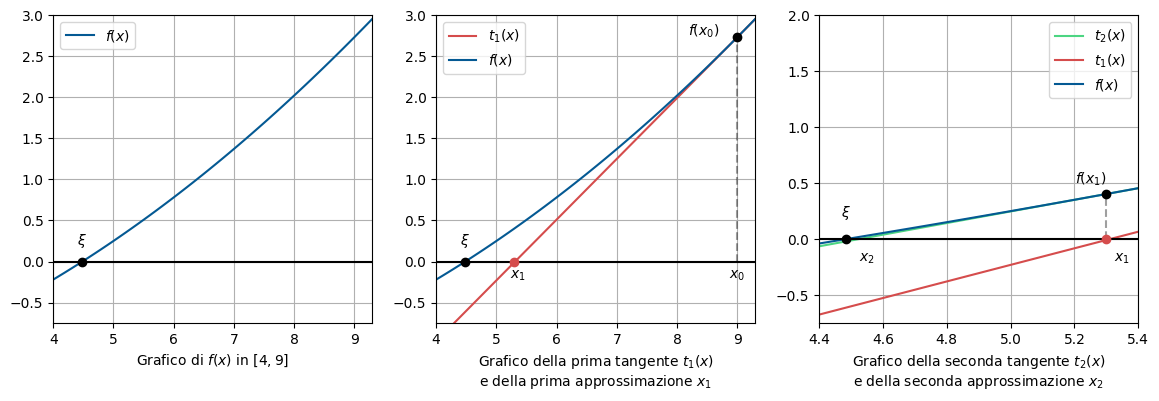

In [31]:
x = [i * 1e-1 for i in range(40, 101)]
y0 = [0 for _ in x]
y1 = [f3(x_i) for x_i in x]
t1 = [tan1(x_i) for x_i in x]
t2 = [tan2(x_i) for x_i in x]

fig, axs = plt.subplots(1, 3, figsize=(14,4))

# Tangents
for ax in axs[2:]:
    ax.plot(x, t2, color="#4cd582", label="$t_2(x)$")

for ax in axs[1:]:
    ax.plot(x, t1, color="#d54c4c", label="$t_1(x)$")

for ax in axs:
    # Lines
    ax.plot(x, y1, label="$f(x)$", color="#045993")
    ax.plot(x, y0, color="black")
    ax.set_ylim(-0.75, 3)
    ax.plot(4.4840, 0, "o", color="black")
    ax.annotate("$\\xi$", (4.4840, 0.2), ha="center")

    ax.grid()
    ax.legend()

for ax in axs[2:]:
    ax.plot([5.3, 5.3], [0, 0.4], "--", color="#00000060")
    ax.plot(5.3, 0.4, "o", color="black")
    ax.annotate("$f(x_1)$", (5.25, 0.5), ha="center")

    ax.annotate("$x_2$", (4.55, -0.2), ha="center")

for ax in axs[1:]:
    ax.plot([9, 9], [0, 2.70], "--", color="#00000060")
    ax.annotate("$x_0$", (9, -0.2), ha="center")
    ax.plot(9, 2.73, "o", color="black")
    ax.annotate("$f(x_0)$", (8.45, 2.75), ha="center")
    
    ax.plot(5.3, 0, "o", color="#d54c4c")
    ax.annotate("$x_1$", (5.35, -0.2), ha="center")

axs[0].set_xlim(4, 9.3)
axs[1].set_xlim(4, 9.3)
axs[2].set_xlim(4.4, 5.4)
axs[2].set_ylim(-0.75, 2)

axs[0].set_xlabel("Grafico di $f(x)$ in $[4, 9]$")
axs[1].set_xlabel("Grafico della prima tangente $t_1(x)$\ne della prima approssimazione $x_1$")
axs[2].set_xlabel("Grafico della seconda tangente $t_2(x)$\ne della seconda approssimazione $x_2$")

savefig('../../notes/assets/image-004.png', transparent=True, bbox_inches="tight")